In [143]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import sparse,  io, linalg
import pickle
from tqdm import tqdm_notebook as tqdm
import networkx as nx
import snap
%load_ext autoreload
%autoreload 2


def get_records_of_year(records, year):
    selected_rows = (records[np.array([idx for idx in range(records.shape[0]) if records[idx, 2] == year]),:])
    return selected_rows[:,np.array([0,1,3])]
    # Removes year
def graph_from_array(records):
    G = nx.Graph()
    for i in tqdm(range(records.shape[0])):
        if G.has_edge(-records[i,0],records[i,1]):
            G[-records[i,0]][records[i,1]]['weight']+=records[i,2]
        else:
            G.add_edge(-records[i,0],records[i,1],weight=records[i,2])
    for e in G.edges_iter():
        G[e[0]][e[1]]['weight_inv']=1/float(G[e[0]][e[1]]['weight'])
        G[e[0]][e[1]]['weight_inv_exp']=np.exp(-float(G[e[0]][e[1]]['weight'])/3.0)
    return G

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
Don2Com = np.load('/Users/vaishnan/Documents/15826/campaign-contribution-text/Don2Com.data.npy')

In [145]:
G = graph_from_array(get_records_of_year(Don2Com, 2006))
# Reading graph 


ZeroDivisionError: float division by zero

{'weight': 2100}

<IPython.core.display.Javascript object>


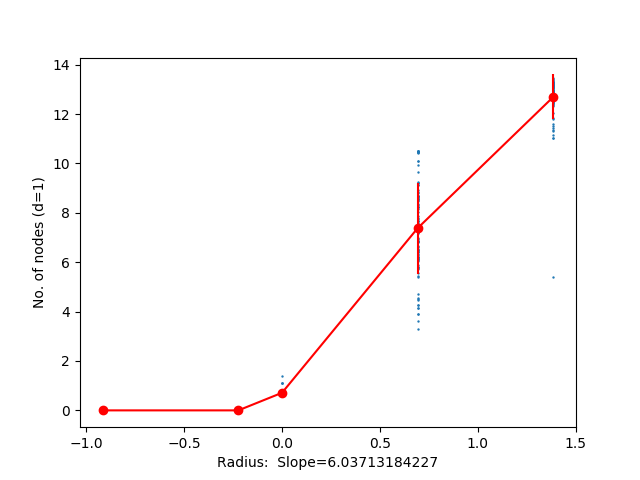

In [141]:
distances=[0.4,0.8,1.0,2.0,4.0]
pwl = self_similarity(G,distances,size=100)
plot_log_log_summary(np.asarray(pwl),"Radius", "No. of nodes (d=1)",discrete=True,summary=np.mean)

<IPython.core.display.Javascript object>


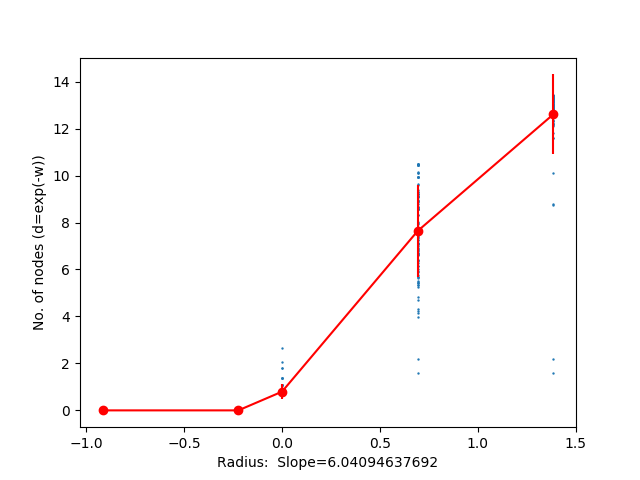

In [142]:
pwl = self_similarity(G,distances,size=100,weight='weight_inv_exp')
plot_log_log_summary(np.asarray(pwl),"Radius", "No. of nodes (d=exp(-w))",discrete=True,summary=np.mean)
distances=[0.16,0.32,0.64,1.0,2.0,4.0,8.0,16.0]

In [ ]:
distances=[0.4,0.8,1.0,2.0,4.0]
pwl = self_similarity(G,distances,size=100)
plot_log_log_summary(np.asarray(pwl),"Radius", "No. of nodes (d=1)",discrete=True,summary=np.mean)

In [120]:
#mutual neighbors
pwl = []
for e in tqdm(G.edges_iter()):
    wt = G[e[0]][e[1]]['weight'] #/float(G.degree(e[0],weight='weight')+G.degree(e[1],weight='weight'))
    nbr1 = set(G.neighbors(e[1]))
    nbr2 = []
    for v in G.neighbors(e[0]):
        nbr2 += G.neighbors(v)
    nbr2 = set(nbr2)
    common_nbrs= set.intersection(nbr1,nbr2)
    #score = sum([1/np.log(len(college_messages_G.neighbors(v))) for v in common_nbrs])
    score = len(common_nbrs)#/float(len(set.union(nbr1,nbr2)))
    #score = len(set.intersection(nbr1,nbr2)
    pwl += [(wt, score)]

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


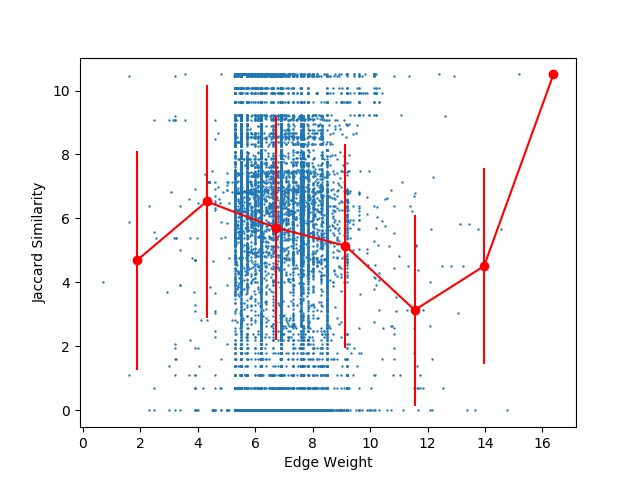

In [121]:
#plot_log_log(np.asarray(pwl))
plot_log_log_summary(np.asarray(pwl),"Edge Weight", "Jaccard Similarity",B=6)

In [48]:
pwl

[(0.014826596165344177, 0.004914004914004914),
 (0.004482067746937885, 0.002457002457002457),
 (0.03731441994786798, 0.014084507042253521),
 (0.017166113431772809, 0.00036153289949385393),
 (0.022956427376517381, 0.0014698677119059284),
 (0.015803699695756221, 0.008287292817679558),
 (0.010852513855424881, 0.004807692307692308),
 (0.010456971228222795, 0.00034094783498124785),
 (0.056920257924487509, 0.0008726003490401396),
 (0.0088605859579334867, 0.007371007371007371),
 (0.0066754919377816592, 0.0027149321266968325),
 (0.013185219376250536, 0.0019292604501607716),
 (0.020774743531829915, 0.0003729951510630362),
 (0.02258262281357043, 0.0005558643690939411),
 (0.019746371447677276, 0.0009049773755656109),
 (0.014223110727314808, 0.002857142857142857),
 (0.0082239071468140947, 0.0003315649867374005),
 (0.0084980807265571806, 0.0006747638326585695),
 (0.0096999587067574319, 0.0019083969465648854),
 (0.021219001258831204, 0.0017605633802816902),
 (0.0024586419240338712, 0.000329163923633

545it [00:24, 22.14it/s]